In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test.csv')

train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# 📐 Dataset shape
print("Shape of training data:", train_df.shape)

# 🧱 Structure of the dataset
print("\n🔎 Info:")
train_df.info()

# 🕳️ Missing values in each column
print("\n🕳️ Missing Values:")
print(train_df.isnull().sum())


Shape of training data: (891, 12)

🔎 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

🕳️ Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare      

In [3]:
train_df.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


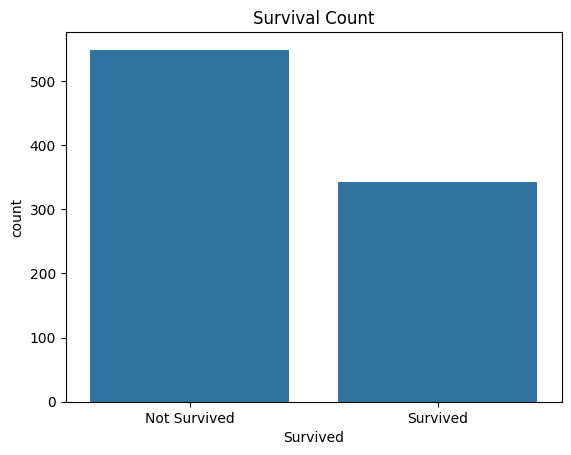

Overall Survival Rate: 38.38%


In [4]:
# 📊 Count of survived vs not survived
sns.countplot(data=train_df, x='Survived')
plt.title("Survival Count")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

# 💯 Survival Rate
survival_rate = train_df['Survived'].mean()
print(f"Overall Survival Rate: {survival_rate:.2%}")


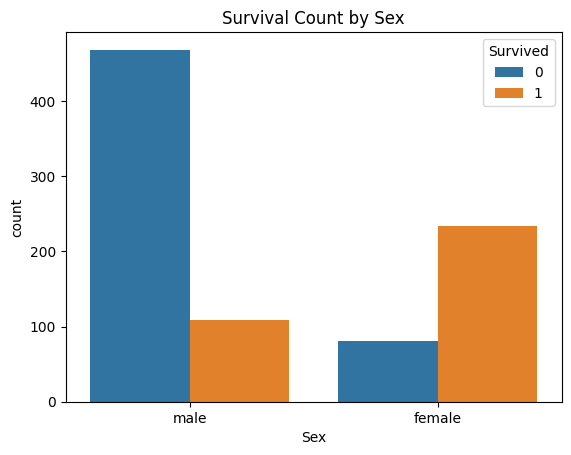

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [5]:
# 📊 Survival by Sex
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title("Survival Count by Sex")
plt.show()

# 💡 Survival rates
print(train_df.groupby('Sex')['Survived'].mean())


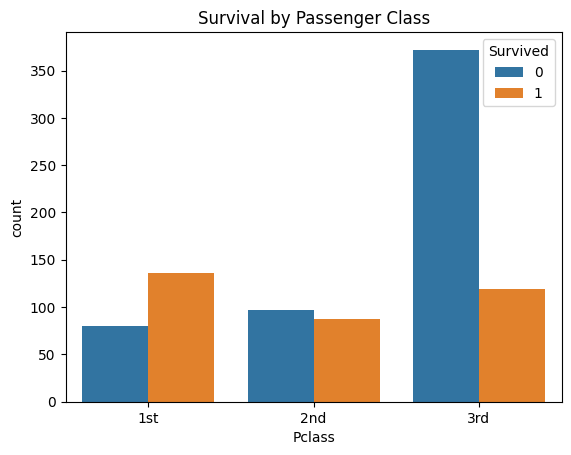

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [6]:
# 📊 Survival count by Pclass
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.xticks([0, 1, 2], ['1st', '2nd', '3rd'])
plt.show()

# 💡 Survival rates by class
print(train_df.groupby('Pclass')['Survived'].mean())


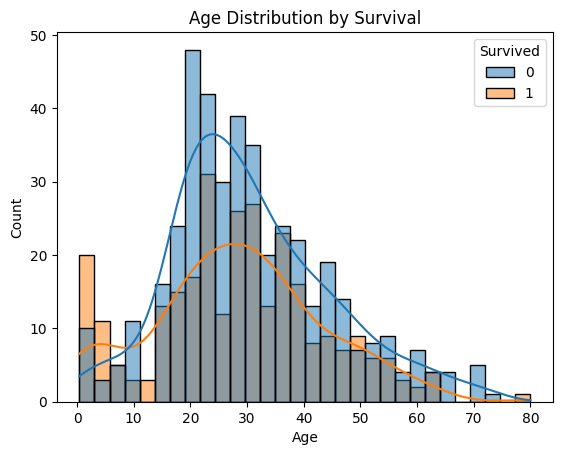

In [7]:
# 📊 Age distribution for Survived vs Not Survived
sns.histplot(data=train_df, x='Age', hue='Survived', kde=True, bins=30)
plt.title("Age Distribution by Survival")
plt.show()


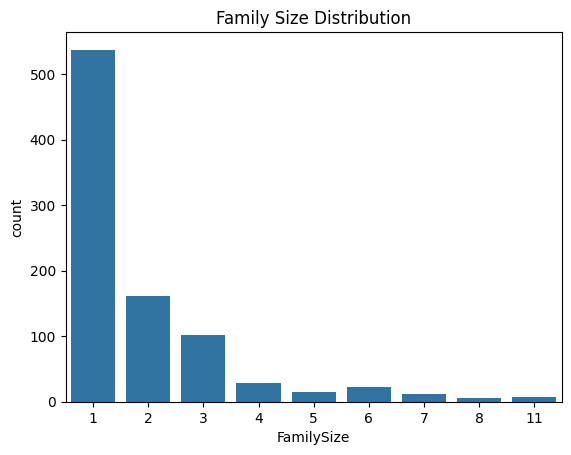

In [8]:
# 👨‍👩‍👧‍👦 Create FamilySize feature
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1  # +1 for the passenger itself

# 📊 Check the distribution of FamilySize
sns.countplot(data=train_df, x='FamilySize')
plt.title("Family Size Distribution")
plt.show()


In [9]:
# 🧹 Handle missing values

# Fill missing Age with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Fill missing Embarked with the most common value (mode)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column due to too many missing values
train_df.drop(columns='Cabin', inplace=True)

# 📊 Check for any remaining missing values
print(train_df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_47140\3990157428.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_47140\3990157428.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

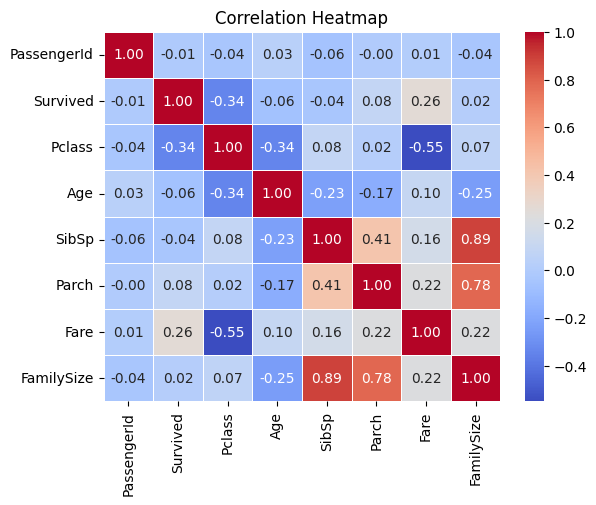

In [10]:
# 📊 Correlation Heatmap for Numeric Columns
numeric_cols = train_df.select_dtypes(include=['float64', 'int64'])  # Only numeric columns
corr = numeric_cols.corr()

# Plotting the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [11]:
# 👤 IsAlone feature: 1 if the passenger is alone, 0 otherwise
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)


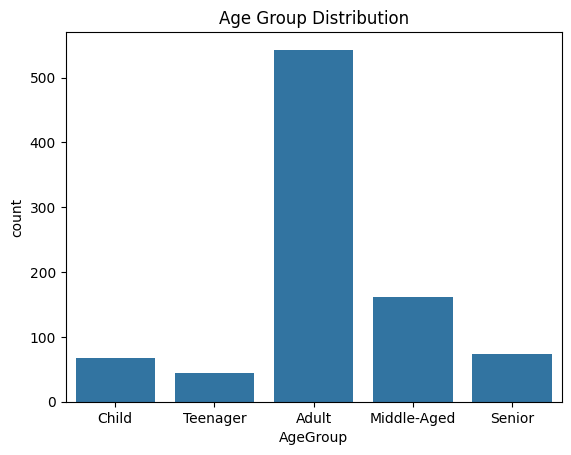

In [12]:
# 👶 AgeGroup feature
bins = [0, 12, 18, 35, 50, 100]  # Age group ranges
labels = ['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)

# 📊 Check the distribution of AgeGroup
sns.countplot(data=train_df, x='AgeGroup')
plt.title("Age Group Distribution")
plt.show()


In [13]:
# 🛳️ Convert Embarked to numeric
train_df['Embarked_Encoded'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [14]:
# 🚹 Convert Sex to numeric
train_df['Sex_Encoded'] = train_df['Sex'].map({'male': 0, 'female': 1})


In [15]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,AgeGroup,Embarked_Encoded,Sex_Encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,Adult,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,Middle-Aged,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Adult,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,Middle-Aged,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,Middle-Aged,0,0


In [16]:
from sklearn.model_selection import train_test_split

# 🧑‍🏫 Select features and target
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_Encoded', 'Sex_Encoded']
X = train_df[features]  # Features
y = train_df['Survived']  # Target

# 🔑 Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 🎯 Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# 🏃‍♂️ Train the model
model.fit(X_train, y_train)

# 🧪 Predict on the test data
y_pred = model.predict(X_test)

# 📊 Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# 🧩 Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 82.12%
Confusion Matrix:
[[90 15]
 [17 57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [20]:
from sklearn.model_selection import GridSearchCV

# 📝 Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # ✅ Removed 'auto'
}


# 🧑‍🏫 Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# 🔍 Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# 🏃‍♂️ Fit the model to the training data
grid_search.fit(X_train, y_train)

# 📈 Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# 🏆 Use the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# 🧪 Evaluate the tuned model on the test data
y_pred_tuned = best_rf_model.predict(X_test)

# 📊 Evaluate the performance
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy after Hyperparameter Tuning: {accuracy_tuned:.2%}")

# 🧩 Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy after Hyperparameter Tuning: 81.01%
Confusion Matrix:
[[95 10]
 [24 50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.83      0.68      0.75        74

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



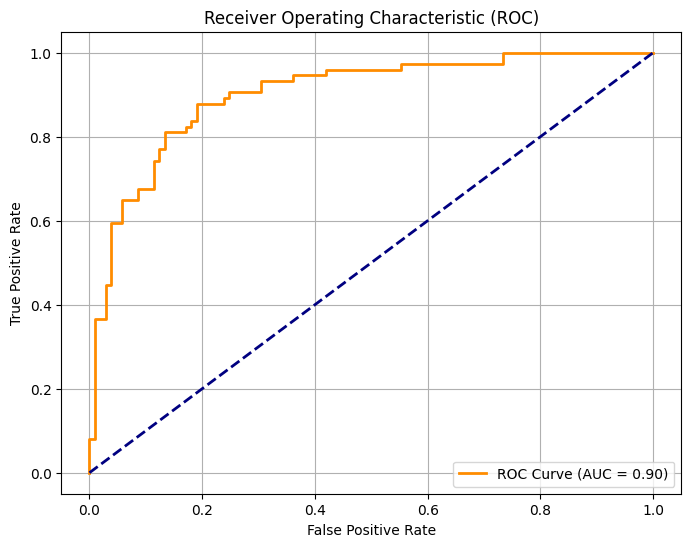

In [23]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1
y_proba = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [22]:
# Assign best_model from GridSearchCV
best_model = grid_search.best_estimator_


In [25]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
# Import SMOTE from imbalanced-learn
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data (X_train, y_train)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train the model again with the balanced data
best_model.fit(X_train_res, y_train_res)

# Make predictions with the re-trained model
y_pred_res = best_model.predict(X_test)

# Calculate accuracy and other metrics
accuracy_res = accuracy_score(y_test, y_pred_res)
print(f"Accuracy after SMOTE: {accuracy_res:.2f}")

# Generate confusion matrix
conf_matrix_res = confusion_matrix(y_test, y_pred_res)
print("Confusion Matrix after SMOTE:")
print(conf_matrix_res)

# Generate classification report
class_report_res = classification_report(y_test, y_pred_res)
print("Classification Report after SMOTE:")
print(class_report_res)

# Calculate ROC AUC for the re-trained model
y_proba_res = best_model.predict_proba(X_test)[:, 1]
fpr_res, tpr_res, _ = roc_curve(y_test, y_proba_res)
auc_res = auc(fpr_res, tpr_res)
print(f"AUC after SMOTE: {auc_res:.2f}")


Accuracy after SMOTE: 0.84
Confusion Matrix after SMOTE:
[[89 16]
 [13 61]]
Classification Report after SMOTE:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       105
           1       0.79      0.82      0.81        74

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.84      0.84      0.84       179

AUC after SMOTE: 0.90


In [28]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [29]:
# Train the model with the best hyperparameters
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate the model
accuracy = best_model.score(X_test, y_test)
print(f"Accuracy after Hyperparameter Tuning: {accuracy * 100:.2f}%")


Accuracy after Hyperparameter Tuning: 81.01%


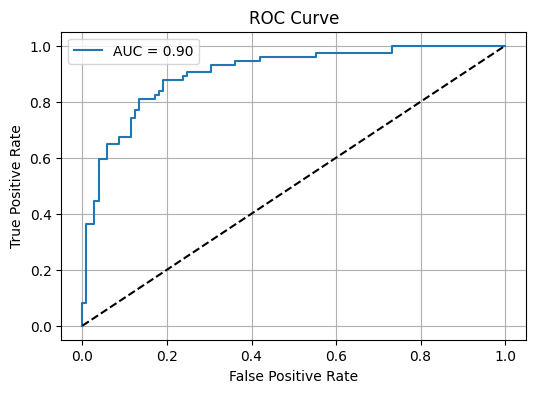

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1
y_proba = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


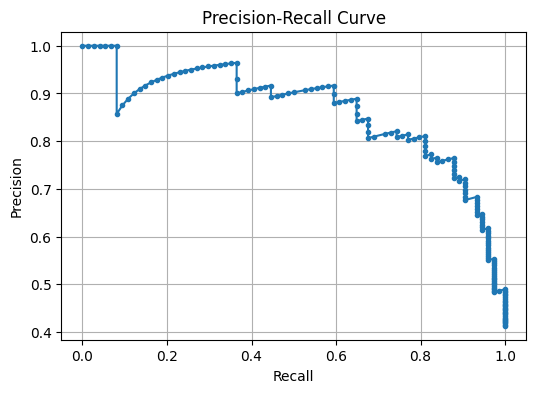

In [31]:
from sklearn.metrics import precision_recall_curve

# Compute precision and recall values
precision, recall, _ = precision_recall_curve(y_test, y_proba)

# Plot the curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()


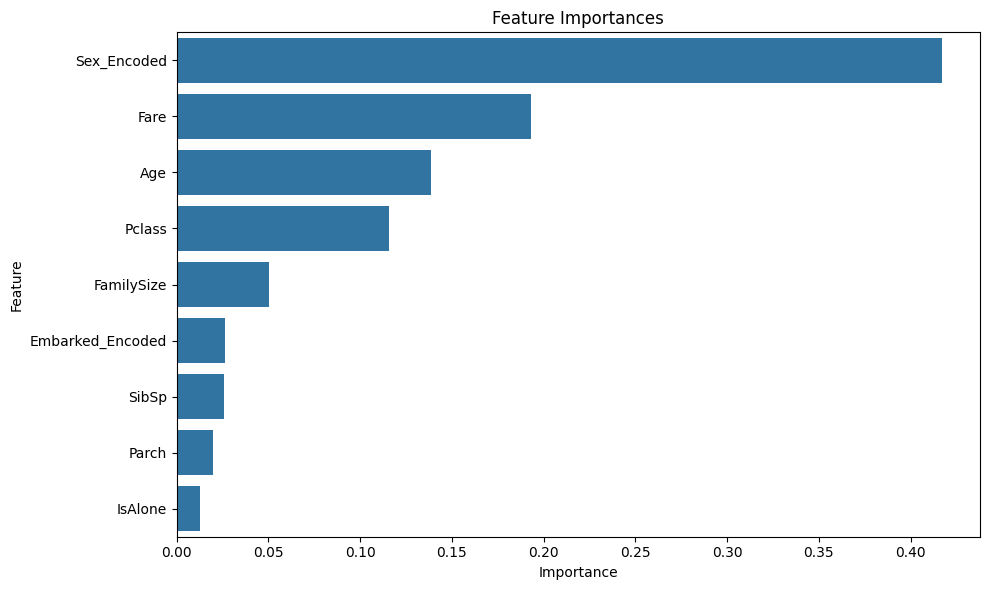

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the final model
importances = best_model.feature_importances_

# Match importances with feature names
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


In [33]:
import joblib

# Save the trained model
joblib.dump(best_model, 'final_random_forest_model.pkl')
print("Model saved as final_random_forest_model.pkl")


Model saved as final_random_forest_model.pkl
